In [1]:
source("C:/Users/Tom Work/PycharmProjects/twipsy-lite/ts.R")


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 



In [2]:
june_over = preprocessing('E:/from-hpc/age/summary/over/casual.csv', 'E:/summary/june_total.csv')
june_under = preprocessing('E:/from-hpc/age/summary/under/casual.csv', 'E:/summary/june_total.csv')

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


In [3]:
june_over_perc = ts((june_over$series/june_over$total)[(49-16):(24*30-16)], frequency=24)
june_under_perc = ts((june_under$series/june_under$total)[(49-16):(24*30-16)], frequency=24)

In [23]:
# for clustering
jo = ts((june_over$series)[(49):(24*30)], frequency=24)
ju = ts((june_under$series)[(49):(24*30)], frequency=24)

In [15]:
# for plotting
jo = ts((june_over$series)[(49-16):(24*30-16)], frequency=24)
ju = ts((june_under$series)[(49-16):(24*30-16)], frequency=24)

In [16]:
ju

Time Series:
Start = c(1, 1) 
End = c(28, 24) 
Frequency = 24 
  [1] 358 210 104  73  49  61 118 184 282 332 357 358 379 432 394 379 432 424
 [19] 502 549 565 619 574 547 377 235 135  73  47  88 128 376 377 288 366 428
 [37] 482 435 435 445 425 446 514 524 590 506 538 464 355 246 139  88  56  78
 [55] 143 190 277 371 397 410 453 426 465 445 457 547 561 584 664 629 606 488
 [73] 387 327 203 113  76  74  94 170 269 378 415 484 547 531 570 555 525 555
 [91] 659 705 679 677 637 601 469 329 220 137  97  59  71 150 221 307 425 474
[109] 574 561 542 536 583 548 515 534 591 543 481 465 383 274 151  95  69  91
[127] 132 227 270 346 368 409 465 458 412 438 454 456 527 557 558 693 583 530
[145] 384 271 143 116  57  70 179 171 228 293 310 405 419 385 412 425 425 461
[163] 483 519 530 544 485 426 398 250 146  97  77  65 117 159 223 323 369 383
[181] 423 410 410 452 439 470 545 581 611 589 587 510 404 339 186 101  65  79
[199] 119 209 243 331 396 384 429 459 451 504 482 490 548 571 568 604 544 498
[

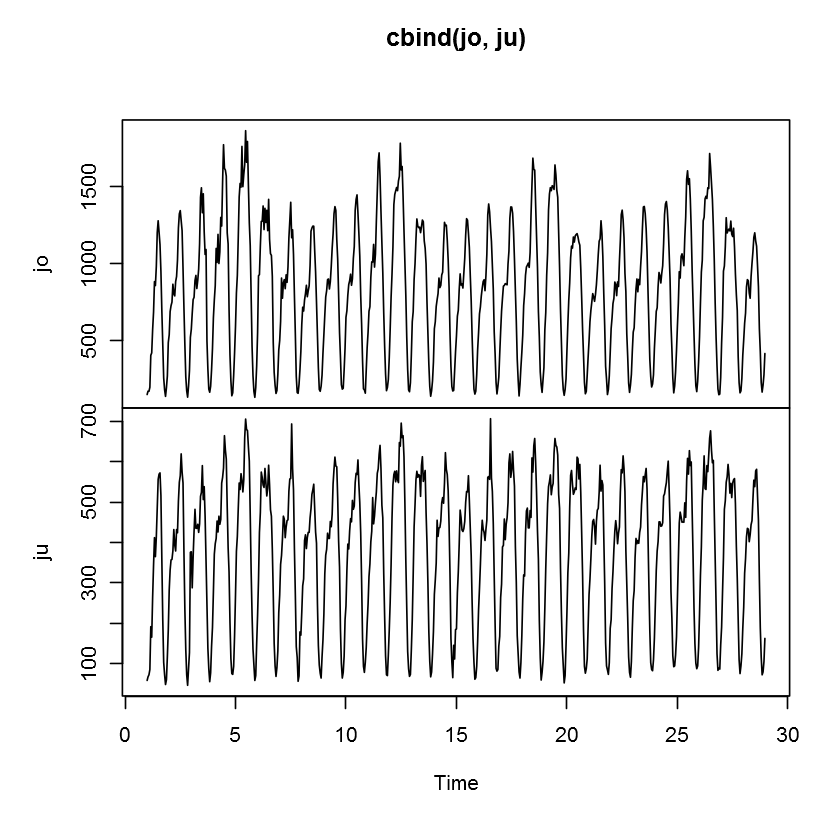

In [13]:
plot.ts(cbind(jo, ju))

In [17]:
o.1 = as.numeric(window(jo, start=c(1, 1), end= c(7, 24)))
o.2 = as.numeric(window(jo, start=c(8, 1), end= c(14, 24)))
o.3 = as.numeric(window(jo, start=c(15, 1), end= c(21, 24)))
o.4 = as.numeric(window(jo, start=c(22, 1), end= c(28, 24)))
u.1 = as.numeric(window(ju, start=c(1, 1), end= c(7, 24)))
u.2 = as.numeric(window(ju, start=c(8, 1), end= c(14, 24)))
u.3 = as.numeric(window(ju, start=c(15, 1), end= c(21, 24)))
u.4 = as.numeric(window(ju, start=c(22, 1), end= c(28, 24)))

In [18]:
weeks = data.frame(o.1, o.2, o.3, o.4, u.1, u.2, u.3, u.4)

In [27]:
age_week_plot <- function(){
    plot.ts(weeks, main='Week by week comparison of overage and underage')
}


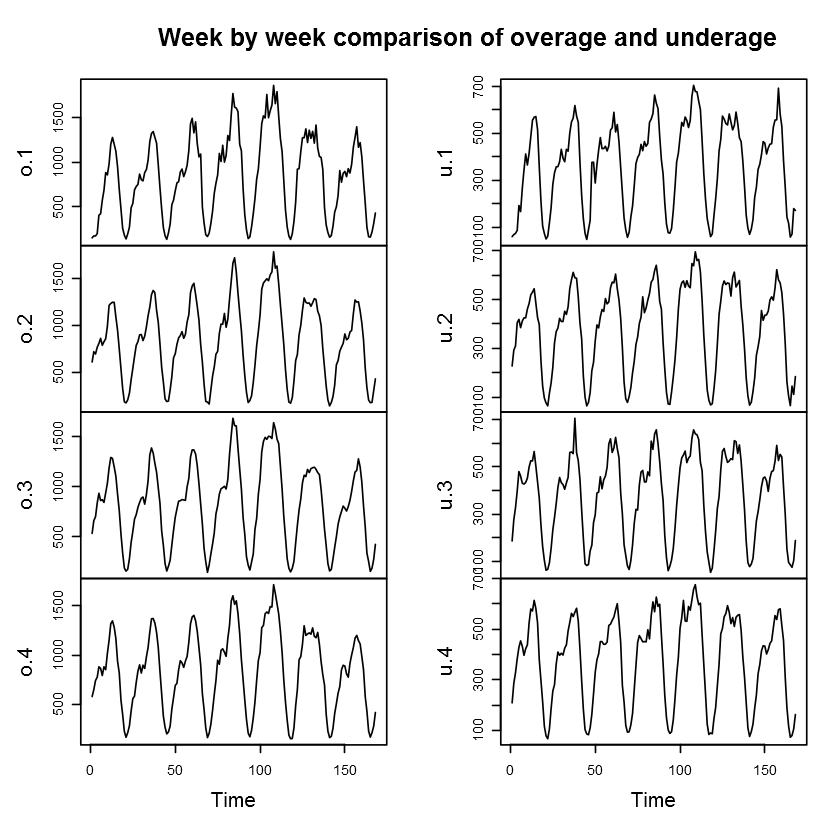

In [14]:
plot.ts(weeks, main='Week by week comparison of overage and underage')

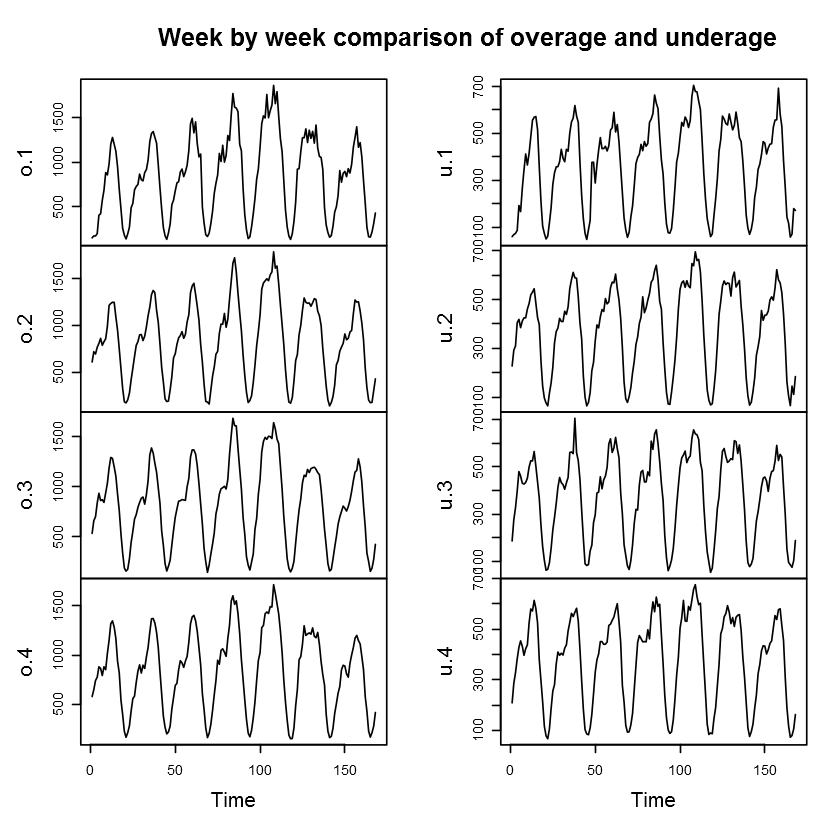

In [35]:
plot.ts(weeks, main='Week by week comparison of overage and underage')

In [9]:
library(TSclust)

Loading required package: pdc
Loading required package: cluster


[1] 1 1 2 1 1 1 2 1


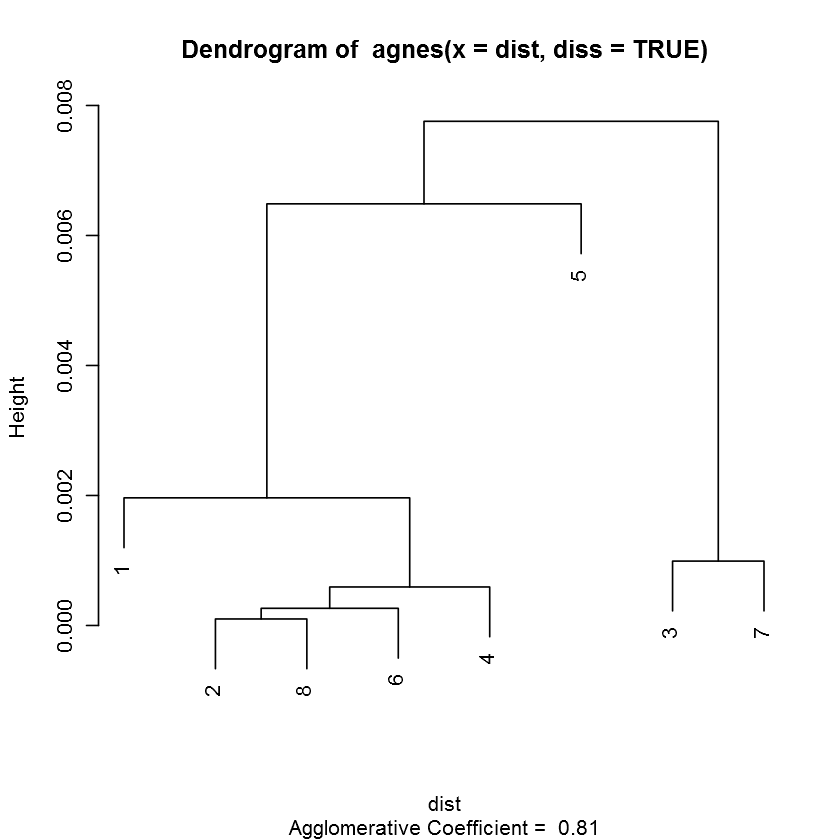

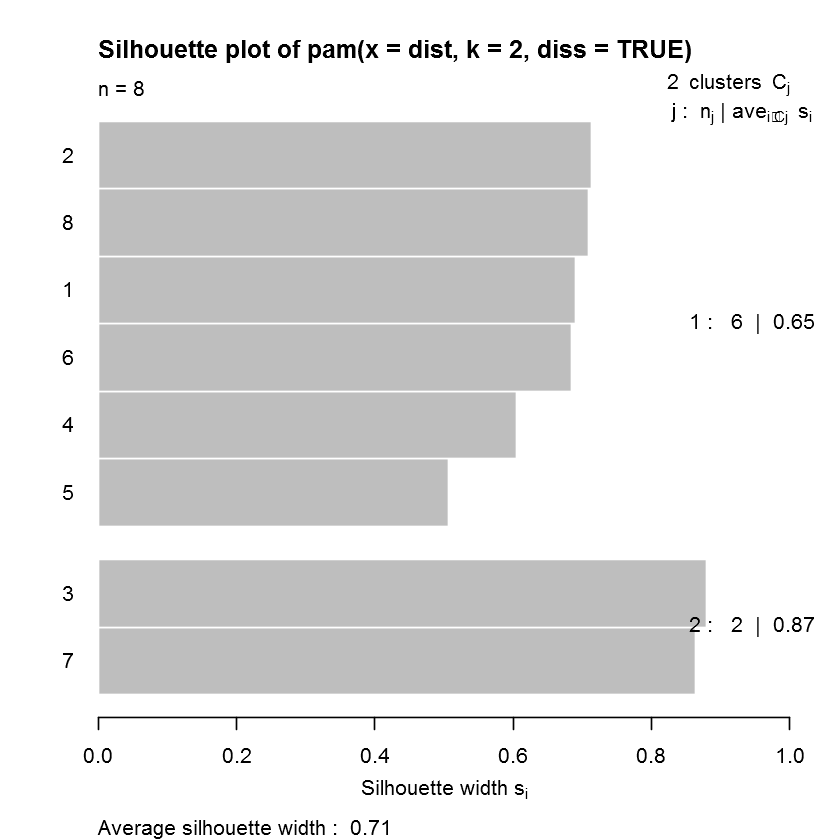

In [30]:
dist = dissimilarity(as.matrix(weeks), phase_dist(7))
clust(dist)

In [36]:
dissimilarity(as.matrix(weeks), phase_dist(4))

0.00000000,0.06327783,0.18035539,0.14658406,0.01924622,0.13516601,0.46046303,0.11105222
6.327783e-02,4.055523e-21,2.436332e-01,8.330623e-02,4.403161e-02,7.188818e-02,4.762591e-01,1.743300e-01
0.18035539,0.24363321,0.00000000,0.32693944,0.19960160,0.31552139,0.28010764,0.06930317
0.14658406,0.08330623,0.32693944,0.00000000,0.12733784,0.01141805,0.39295291,0.25763628
0.01924622,0.04403161,0.19960160,0.12733784,0.00000000,0.11591979,0.47970924,0.13029843
0.13516601,0.07188818,0.31552139,0.01141805,0.11591979,0.00000000,0.40437097,0.24621823
0.4604630,0.4762591,0.2801076,0.3929529,0.4797092,0.4043710,0.0000000,0.3494108
0.11105222,0.17433005,0.06930317,0.25763628,0.13029843,0.24621823,0.34941081,0.00000000


In [37]:
dist = diss(t(apply(weeks, 2, normalize)), METHOD='PER')
clust(dist)

ERROR: Error in eval(expr, envir, enclos): could not find function "diss"


In [10]:
normed_weeks = apply(weeks, 2, normalize)

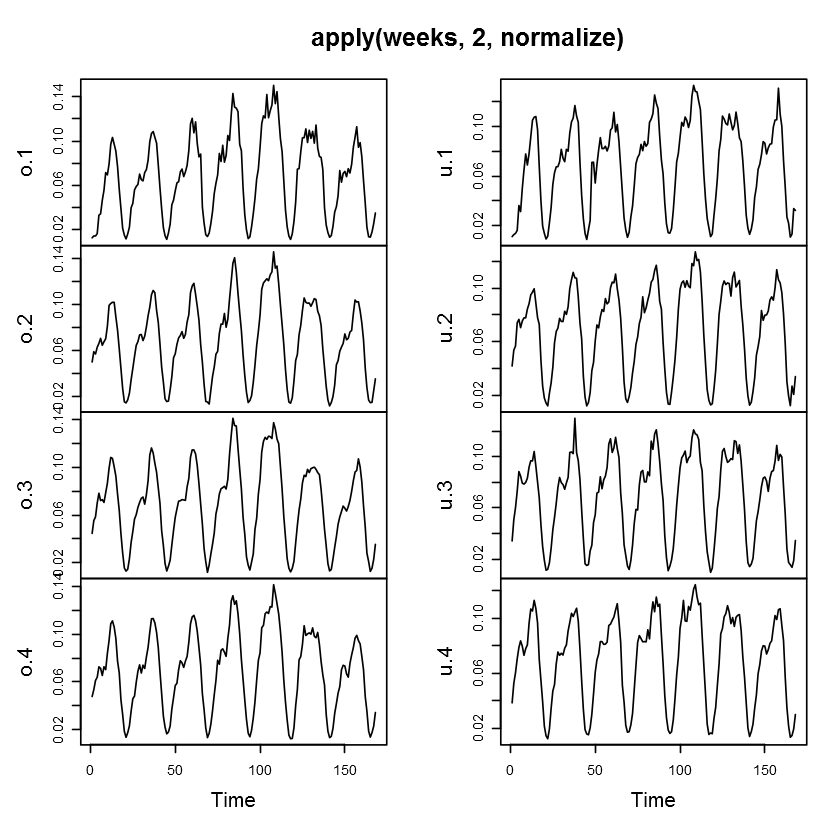

In [39]:
plot.ts(apply(weeks, 2, normalize))

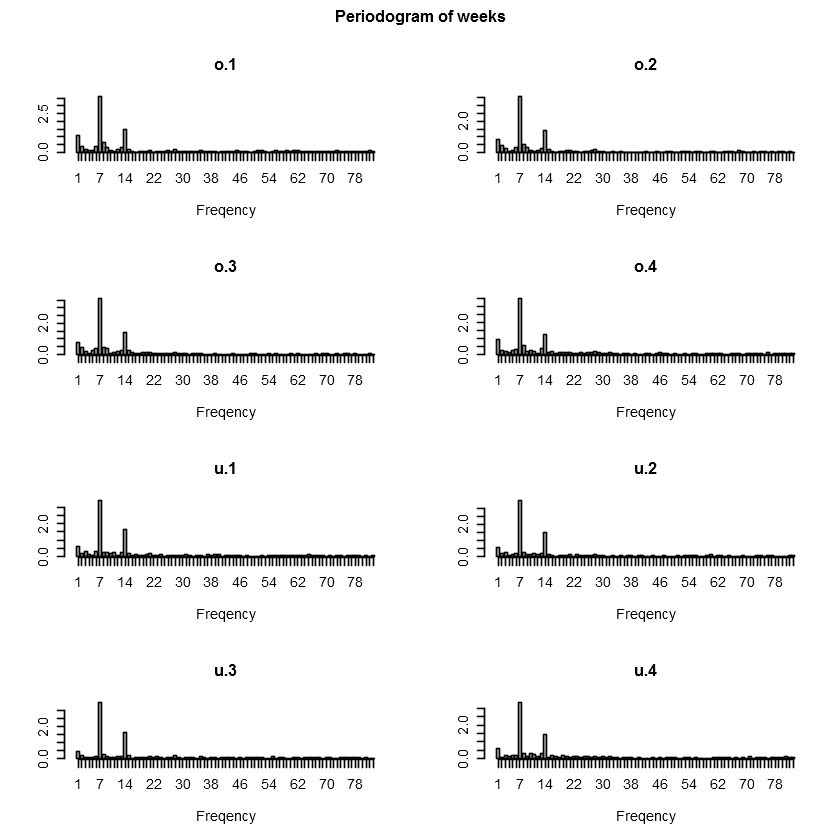

In [73]:
par(mfrow=c(4,2), oma=c(0,0,2,0))
for (i in 1:8){
    bp=barplot(abs(fft(normed_weeks[,i])[2:84]), xlab='Freqency', main=colnames(weeks)[i])
    axis(1, at=bp, labels= c(1:83))
}
title(main='Periodogram of weeks', outer=TRUE)

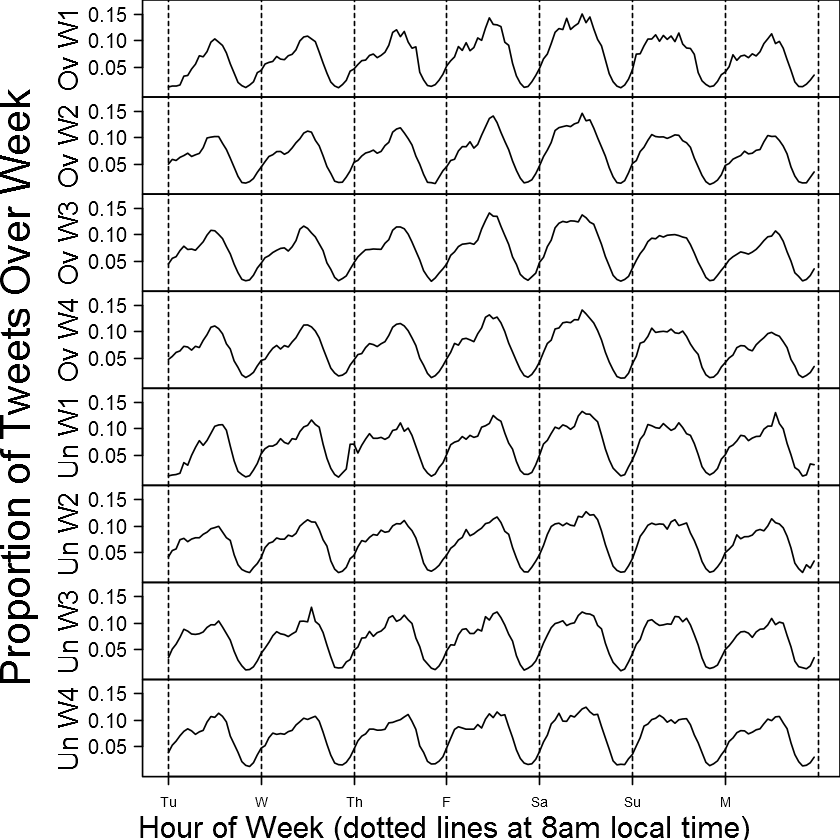

In [10]:
over_under_plot <- function(){
    normed_weeks = (apply(weeks, 2, normalize))
#     week_names = c('Overage w1', 'Overage w2', 'Overage w3', 'Overage w4', 
#                    'Underage w1', 'Underage w2', 'Underage w3', 'Underage w4')
        week_names = c('Ov W1', 'Ov W2', 'Ov W3', 'Ov W4', 
                   'Un W1', 'Un W2', 'Un W3', 'Un W4')
    par(mfrow=c(8,1))
    # outer margin
    par(oma = c(4, 3, 0, 0))
    for (col in 1:8){
        # remove space for x-axis
        yrange = c(0, 0.17)
        par(mar = c(0, 6, 0, 0))
        plot(normed_weeks[, col], type='l', xaxt='n', ylim=yrange, yaxt='n', ylab='')
        title(ylab=week_names[col], line=4, las=1, cex.lab=2)
        axis(2, labels = c('0.05', '0.10', '0.15'), at=c(0.05, 0.1, 0.15), las = 1, cex.axis=1.5)
        abline(v=seq(1, (168+24), by=24), lty=2)
}

mtext('Proportion of Tweets Over Week', side = 2, outer = TRUE, line = 1, cex=2)
mtext('Hour of Week (dotted lines at 8am local time)', side = 1, outer = TRUE, line = 3, cex=1.5)
axis(1, labels = c('Tu', 'W', 'Th', 'F', 'Sa', 'Su', 'M'), at=seq(1, 168, by=24), outer=TRUE)

}
over_under_plot()
# save_png(over_under_plot, 'C:/users/tom work/pycharmprojects/twipsy-lite/plots/over-under.png')

In [30]:
 png(filename='C:/users/tom work/pycharmprojects/twipsy-lite/plots/over-under-rev.png', height=800)
  over_under_plot()
  dev.off()

png 
  2

In [48]:
save_png(over_under_plot, 'C:/users/tom work/pycharmprojects/twipsy-lite/plots/over-under-rev.png')

png 
  2

o.1 o.2 o.3 o.4 u.1 u.2 u.3 u.4 
  1   1   1   1   2   2   2   2 


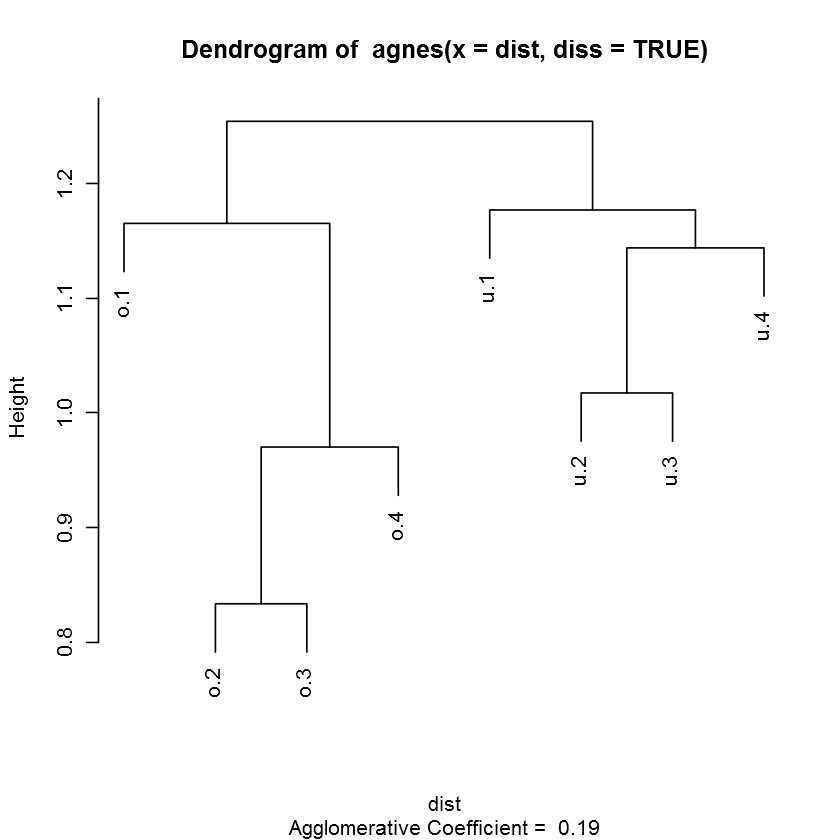

Medoids:
     ID       
[1,] "2" "o.2"
[2,] "6" "u.2"
Clustering vector:
o.1 o.2 o.3 o.4 u.1 u.2 u.3 u.4 
  1   1   1   1   2   2   2   2 
Objective function:
    build      swap 
0.7619944 0.7619944 

Available components:
[1] "medoids"    "id.med"     "clustering" "objective"  "isolation" 
[6] "clusinfo"   "silinfo"    "diss"       "call"      

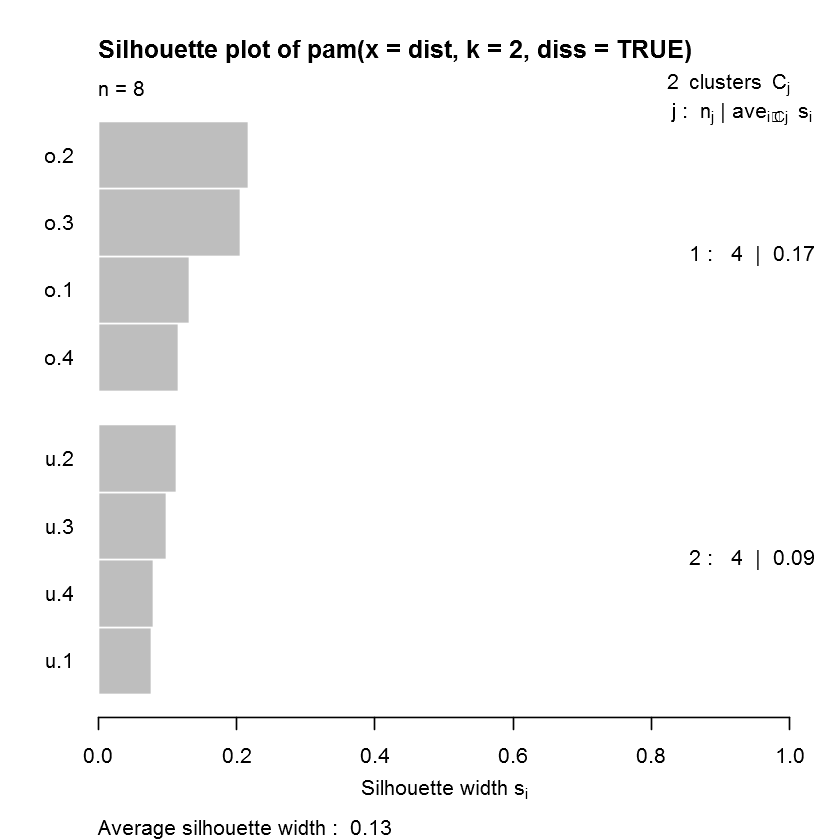

In [19]:
dist = diss(t(apply(weeks, 2, normalize)), METHOD='DTW')
clust(dist)

In [21]:
require(factoextra)

Loading required package: factoextra
Loading required package: ggplot2


png 
  2

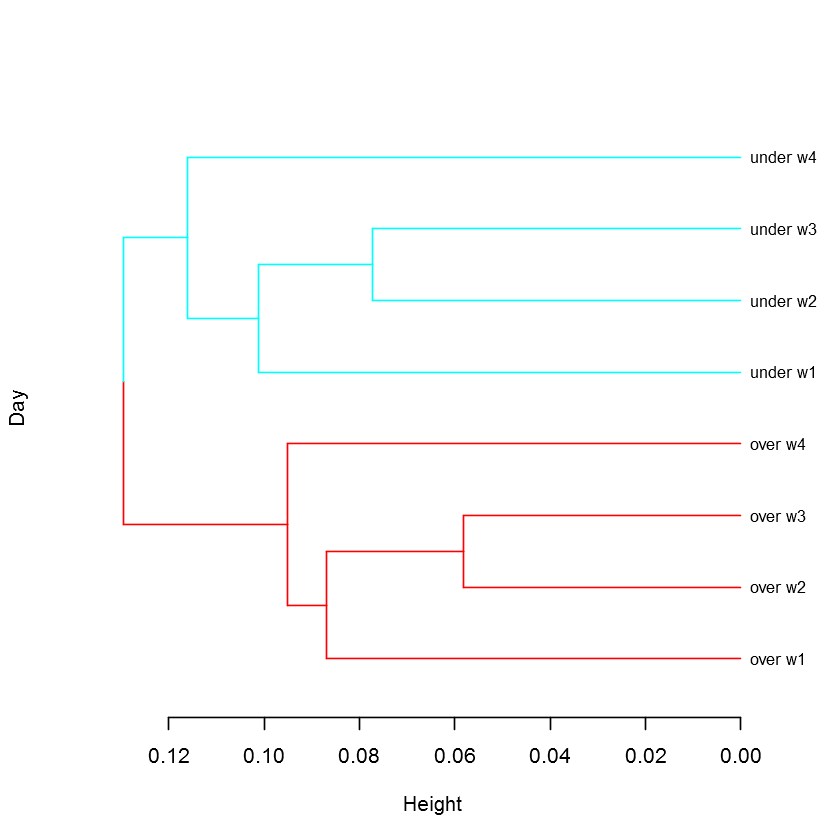

In [35]:
colnames(weeks) = c('over w1', 'over w2', 'over w3', 'over w4', 'under w1','under w2','under w3','under w4')
dist = diss(t(apply(weeks, 2, normalize)), METHOD='EUCL')

par(mar=c(5.1,4.1,4.1,3.1))
a = agnes(dist)
fviz_dend(a,  main='', ylab='Day', xlab='Height', k=2, horiz=TRUE)
# clust(dist)
png(filename='C:/users/tom work/pycharmprojects/twipsy-lite/plots/clustering/age-week-clust.png')
par(mar=c(5.1,4.1,4.1,3.1))
fviz_dend(a,  main='', ylab='Day', xlab='Height', k=2, horiz=TRUE)
dev.off()

In [74]:
plot_age_clust <- function(){
    par(mfrow=c(2,1))

dist = diss(t(apply(weeks, 2, normalize)), METHOD='EUCL')
clust(dist)
}
save_png(plot_age_clust, 'C:/users/tom work/pycharmprojects/twipsy-lite/plots/clustering/age-week-clust.png')

o.1 o.2 o.3 o.4 u.1 u.2 u.3 u.4 
  1   1   1   1   2   2   2   2 


png 
  2

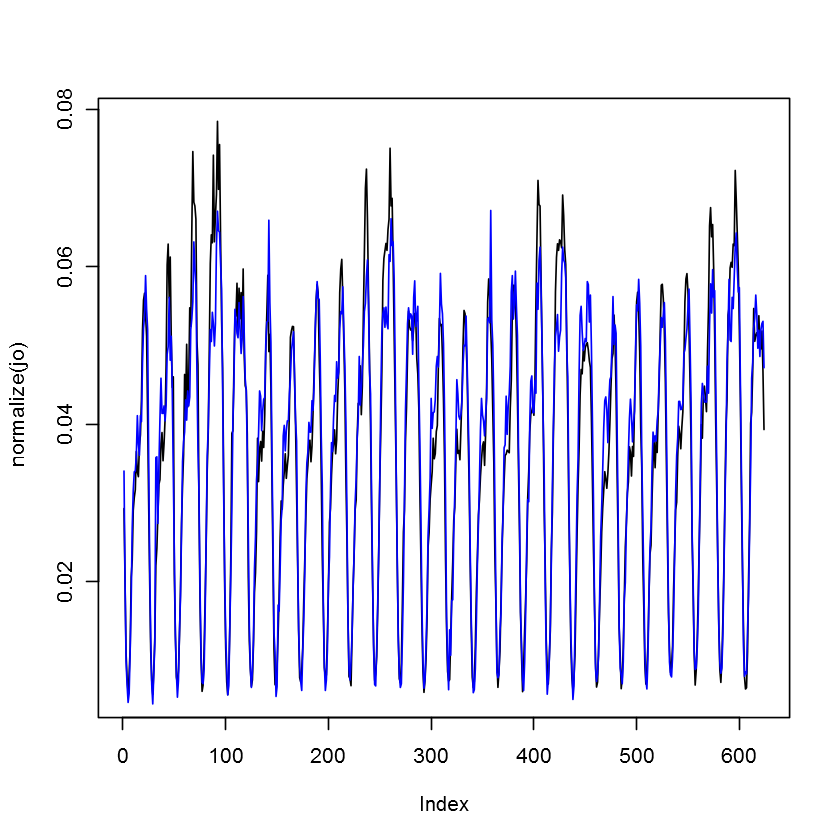

In [79]:
plot(normalize(jo), type='l')
lines(normalize(ju), col='blue')

In [148]:
a = array(NA, dim=c(7, 24, 3))

In [150]:
a[1, , 3] =  c(1:24)

In [153]:
a[1,,3] = window(as.vector(jo), start=1, end=(1+23))

In [101]:
jo = ts(june_over$series[49:(24*30)], frequency=24)
ju = ts(june_under$series[49:(24*30)], frequency=24)

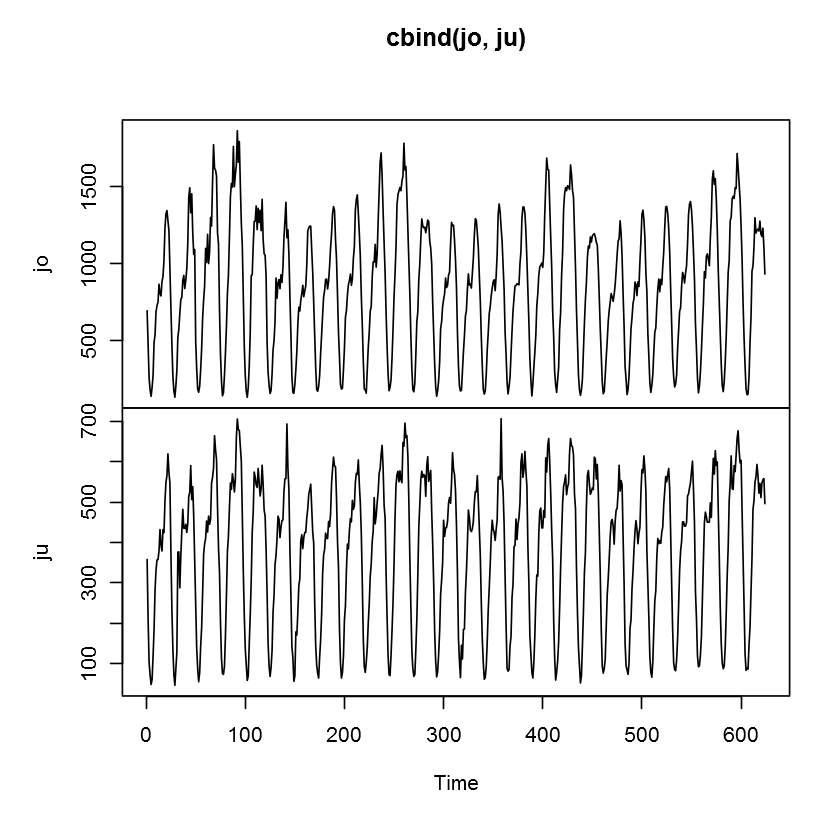

In [36]:
plot.ts(cbind(jo, ju))

In [186]:
j_by_weekday = day_of_week(c(as.vector(jo), as.vector(ju)))

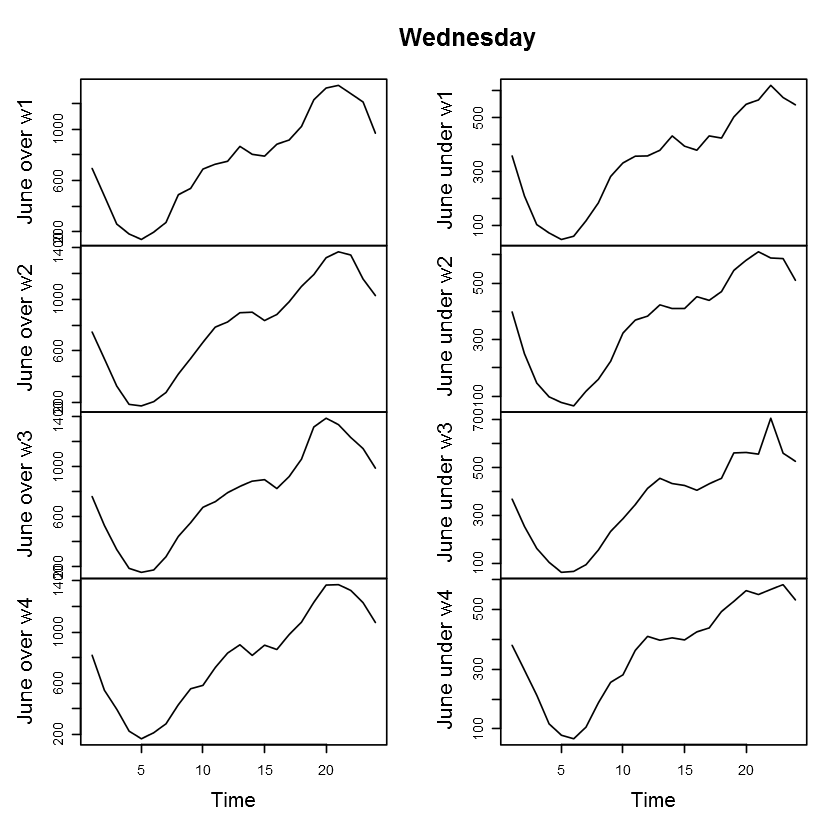

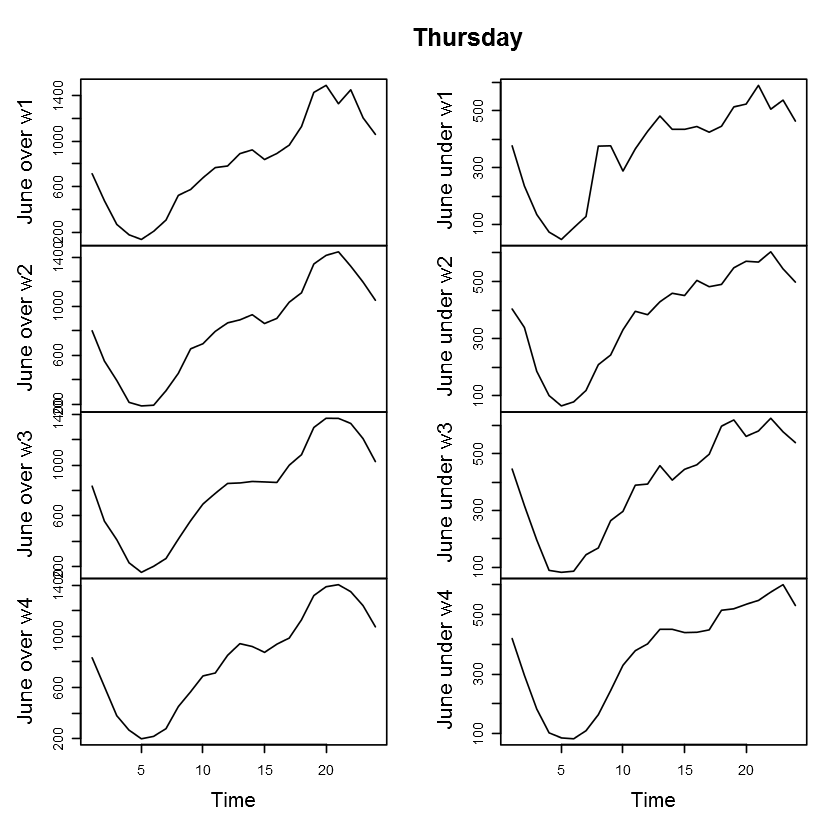

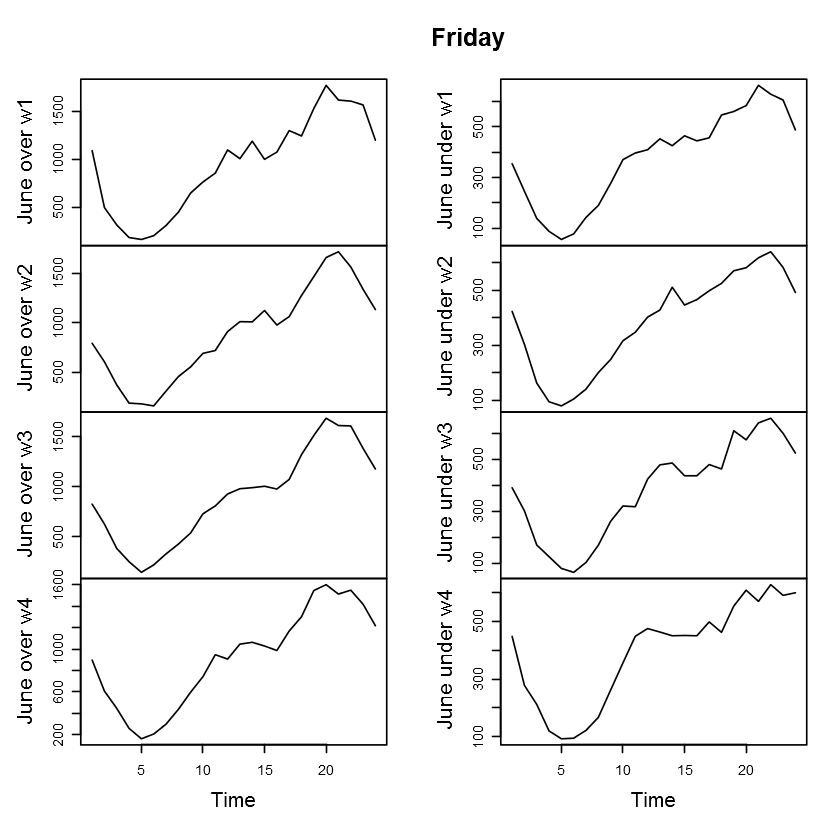

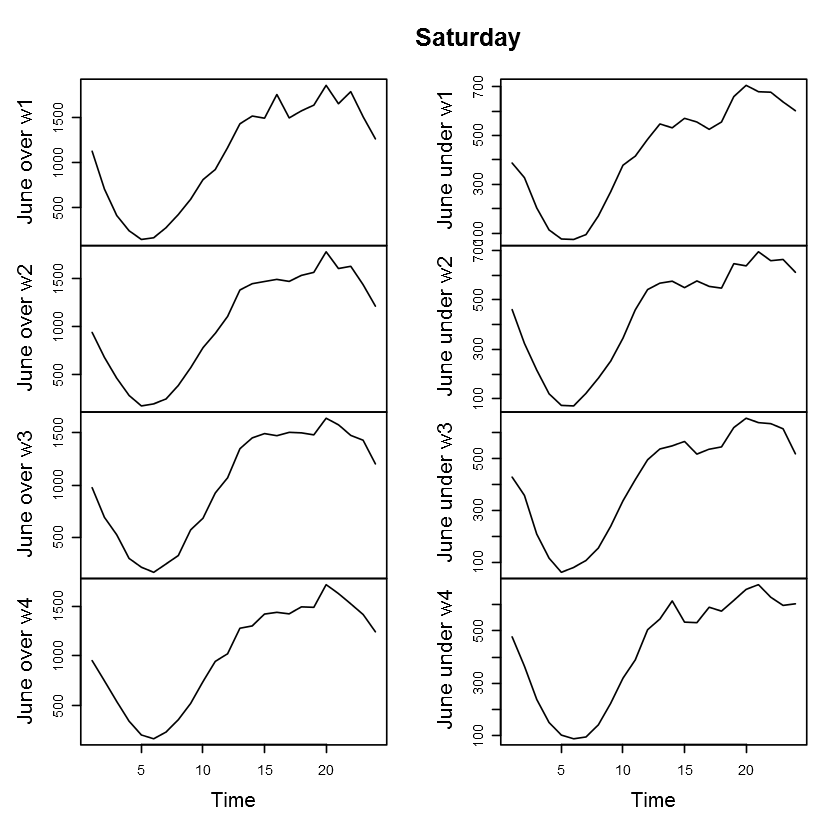

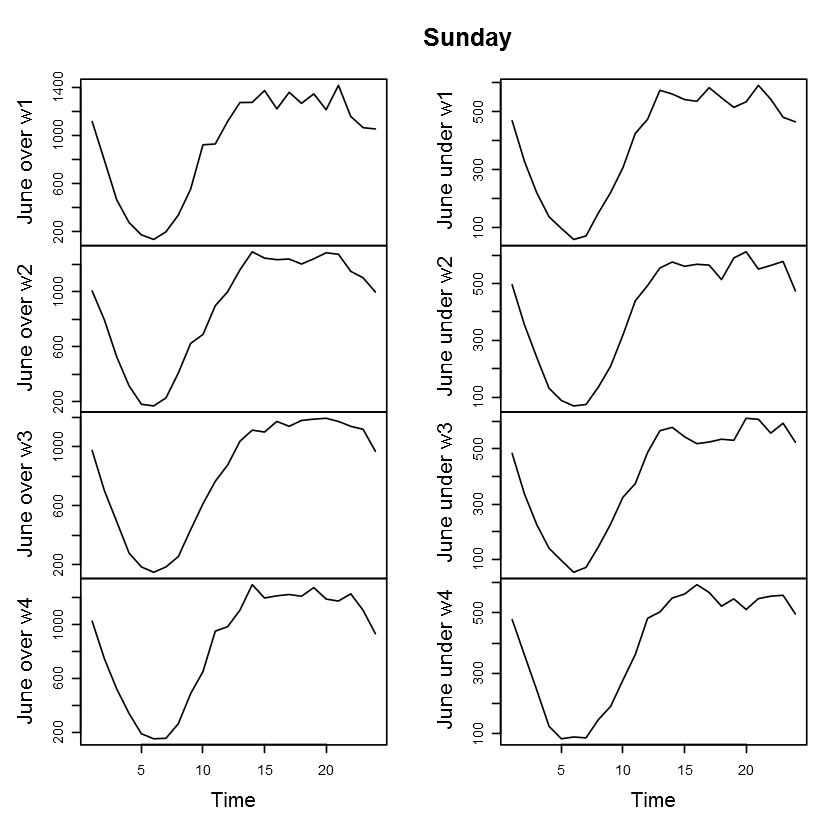

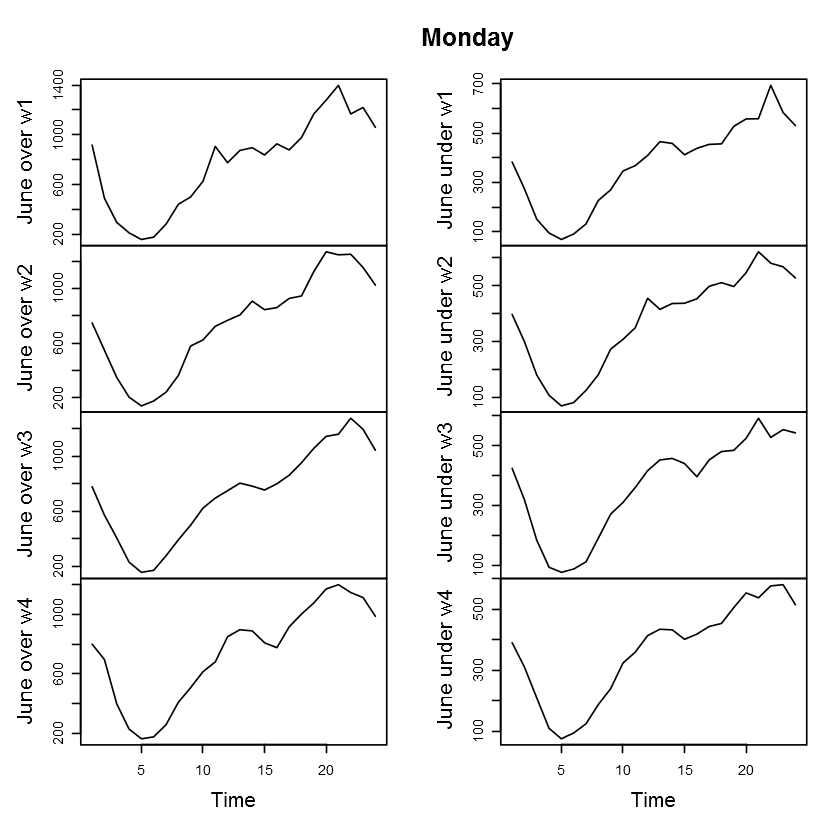

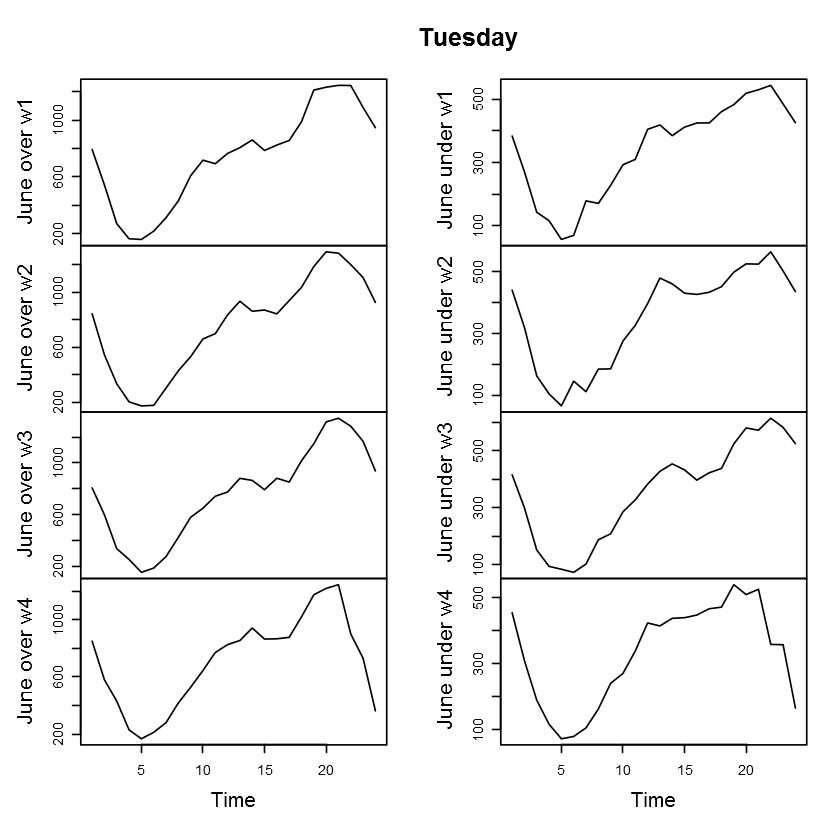

In [199]:
weekdays = c('Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday')
for (weekday in 1:7){
    over_month = data.frame(jo_by_weekday[weekday,,])
    colnames(over_month)=c ('June over w1', 'June over w2', 'June over w3', 'June over w4',
                            'June under w1', 'June under w2', 'June under w3', 'June under w4')
    plot.ts(over_month, main=weekdays[weekday])
}